<a href="https://colab.research.google.com/github/Nayeemhabib/Machine_Learning_Projects/blob/main/Machine_Learning_Projects%5CBreast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Description:- This programe detects breast cancer, based off data.**

**About The Case Study**
** Symptoms for specific types of cancer **
According to the American Cancer Society (ACS)Trusted Source, the most common sign of breast cancer is a new lump or mass in the breast. People should become familiar with the typical look and feel of their breasts to detect any changes early on.
Breast cancer can develop in males and females, but due to differencesTrusted Source in breast tissue, the disease is much less common in males.
Below, we outline some early indications of breast cancer. We also describe the various types and treatment options. Finally, we look into some benign conditions people may mistake for breast cancer.
**Benign breast conditions**
Several benign breast conditions can cause symptoms that resemble those of cancer. Some of these issues require treatment, while others go away on their own.
Though these conditions are benign, they can cause:
discomfort or pain swelling lumps Some common benign breast conditions include:
1:-Cysts: These are fluid-filled sacs that can form in many parts of the body, including the breasts.
2:-Mastitis: This is inflammation (swelling) in the breast that is usually from an infection.
3:-Hyperplasia: This is an overgrowth of cells, particularly in the milk ducts or lobules inside the breast.
4:-Sclerosing adenosis: This is a condition in which lobules enlarge.
5:-Intraductal papillomas: These are benign wart-like tumors that grow within the milk ducts of the breast.
6:-Fibroadenoma: These are common breast tumors that develop when an overgrowth of fibrous or glandular tissue forms around a lobule.
7:-Radial scar: Also called complex sclerosing lesions, these are a core of connective tissue that can resemble breast cancer on a mammogram.
8:-Fat necrosis: This develops following an injury to fatty breast tissue, as can happen following surgery, radiation, or injury to the breast.
9:-Phyllodes tumors: These are fast-growing but typically painless tumors that start in the connective tissue of the breast. Some can be cancerous.
**Procedure**
This kernel uses multiple classification algorithms as below
1:-Multi-layer Perceptron classifier (MLP)
2:-KNeighborsClassifier
3:-AdaBoostClassifier
4:-BaggingClassifier
5:-GradientBoostingClassifier
6:-RandomForestClassifier
Also this kernel does lot of indepth EDA like
1:-univalirate analysis
2:-bivariate analysis
3:-correlation analysis
This kernel utilize the below methods for evaluation of model accuracy
1:-auc
2:-classification report
3:-confusion matrix
** General Liberary Imports**

In [1]:
# Import liberaries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [2]:
# Loading the data.
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('canser.csv')
df.head(7)

Saving canser.csv to canser.csv


,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   Radius_mean              569 non-null    float64
 3   Texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.describe()

,id,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.296678,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301816,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.870000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
df.shape

(569, 32)

In [6]:
df.columns

Index(['id', 'diagnosis', 'Radius_mean', 'Texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

**Null Value Analysis**

In [7]:
df.isna().sum()

id                         0
diagnosis                  0
Radius_mean                0
Texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

**Get a count of the number of Malignant (M) or Benign(B) cells**

In [8]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

**Visualize the count of patients who have Malignant(M) or Benign(B) cells**

B    357
M    212
Name: diagnosis, dtype: int64


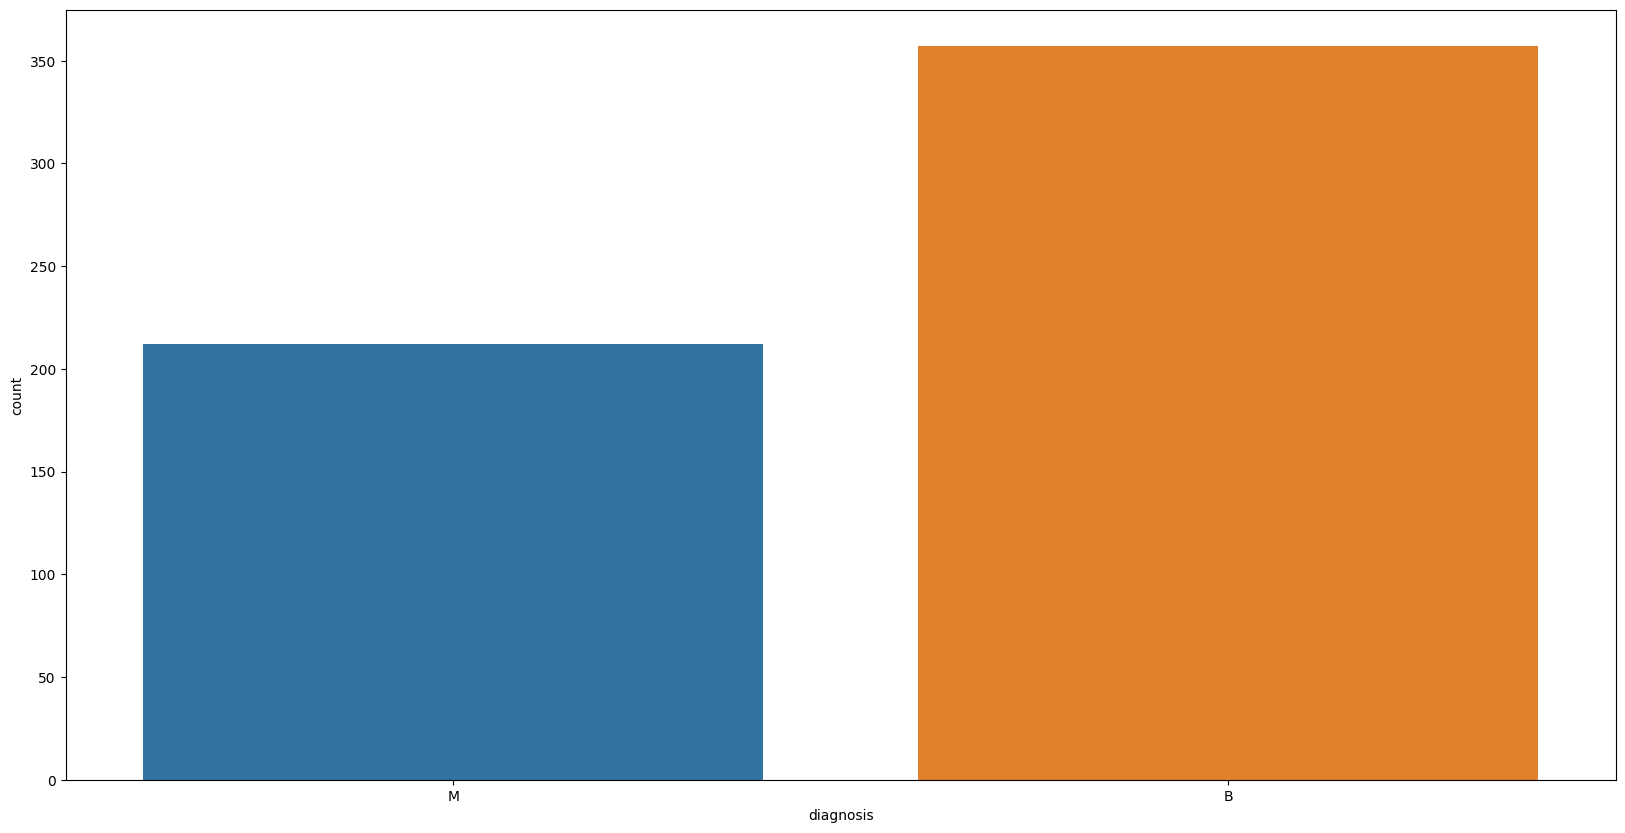

In [9]:
plt.figure(figsize=(20,10))
sns.countplot(x=df["diagnosis"])
print(df["diagnosis"].value_counts())

In [10]:
df.dtypes

id                           int64
diagnosis                   object
Radius_mean                float64
Texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [11]:
# Encode the categorical data values
from sklearn.preprocessing import LabelEncoder
LabelEncoder_Y = LabelEncoder()
LabelEncoder_Y.fit_transform(df.iloc[:,1].values)
df.iloc[:,1].values
#df.iloc[:,1] = LabelEncoder_Y.fit_transform(df.iloc[:,1].values)
#df.iloc[:,1].values

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

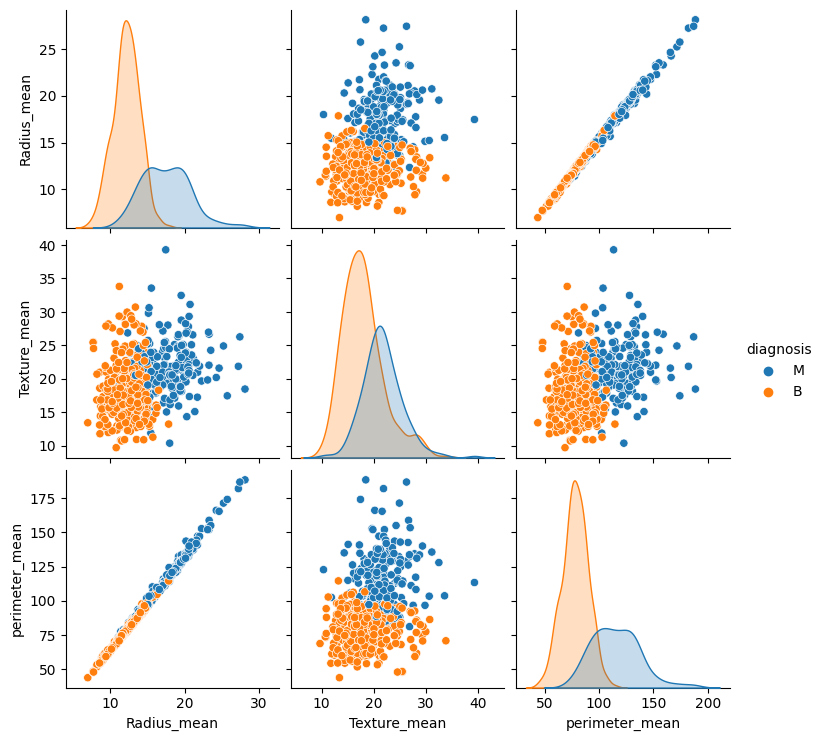

In [12]:
# Creat a pair plot
sns.pairplot(df.iloc[:,1:5] , hue = 'diagnosis')

In [13]:
numeric_columns = [column for column in df.columns if df[column].dtype == 'float64']
print(numeric_columns)

['Radius_mean', 'Texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


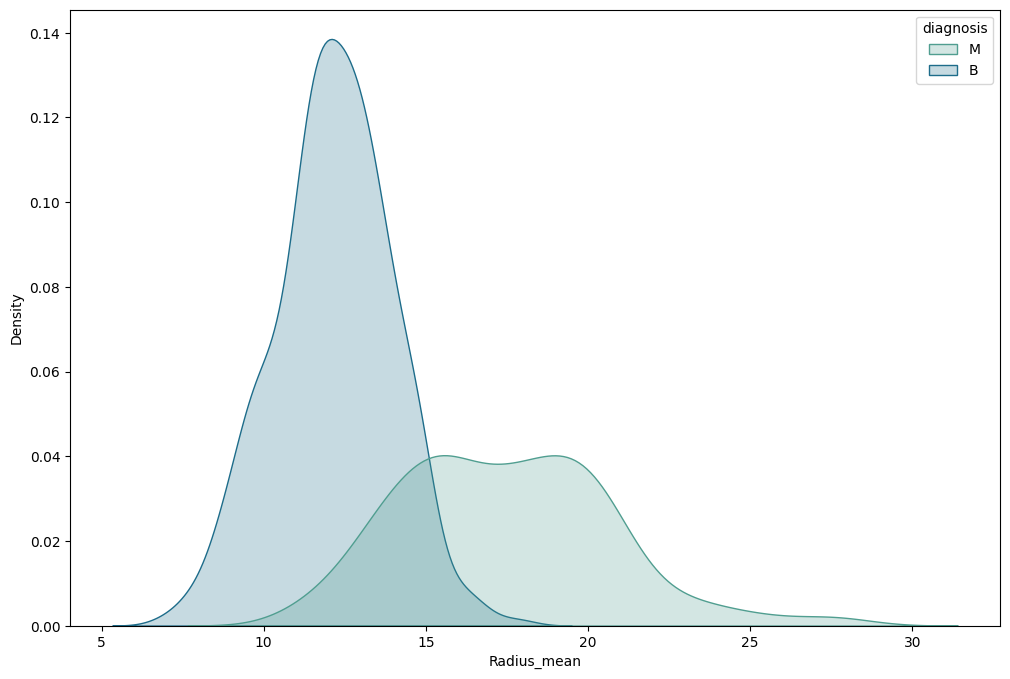

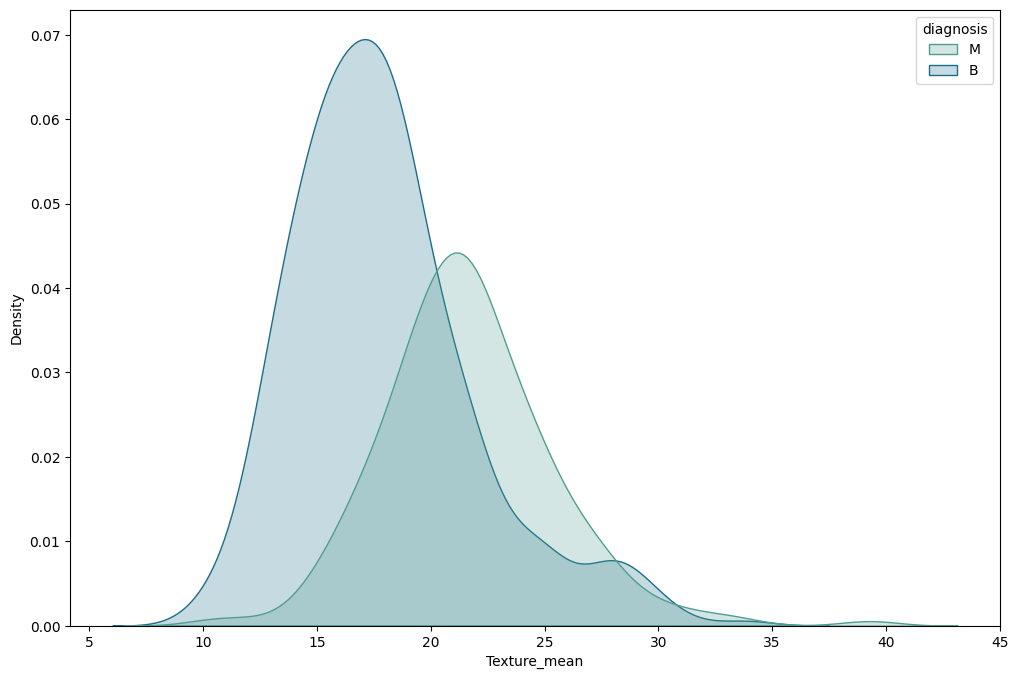

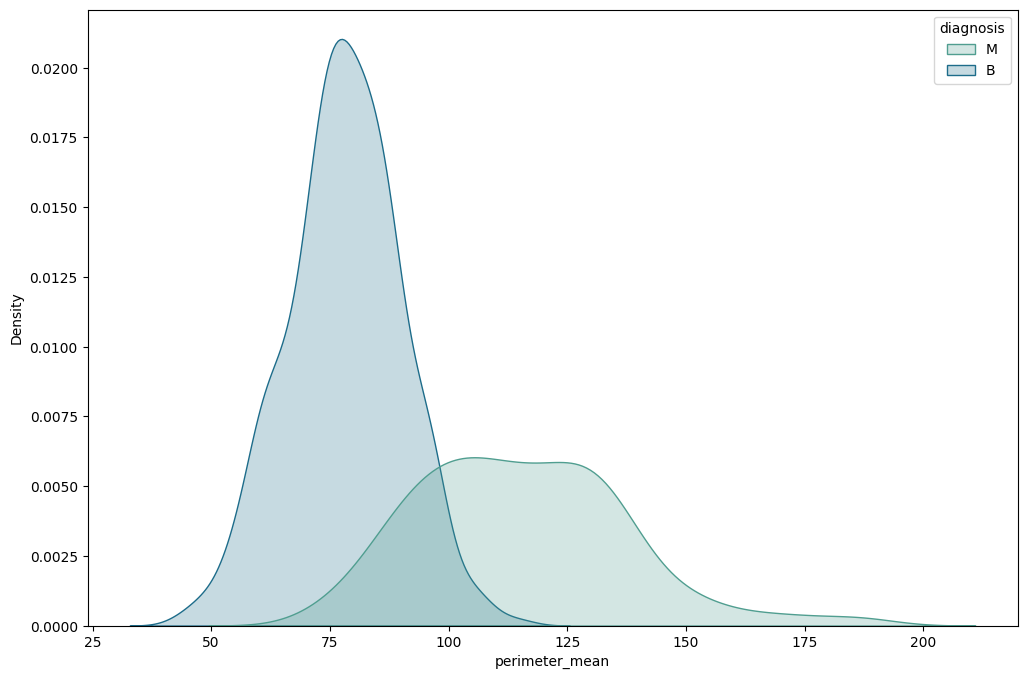

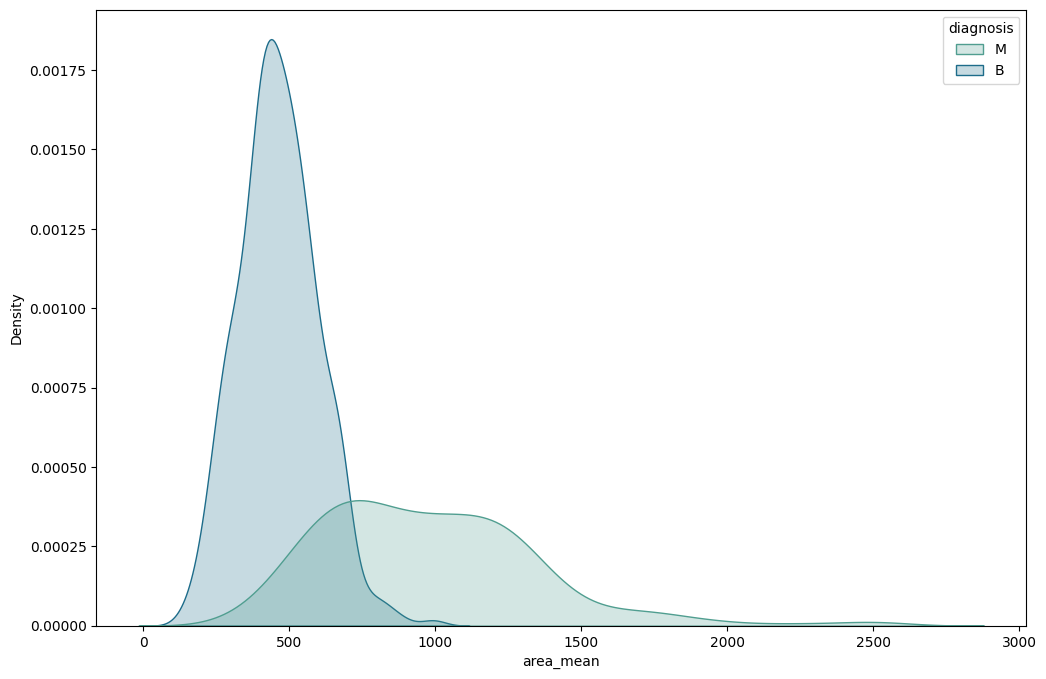

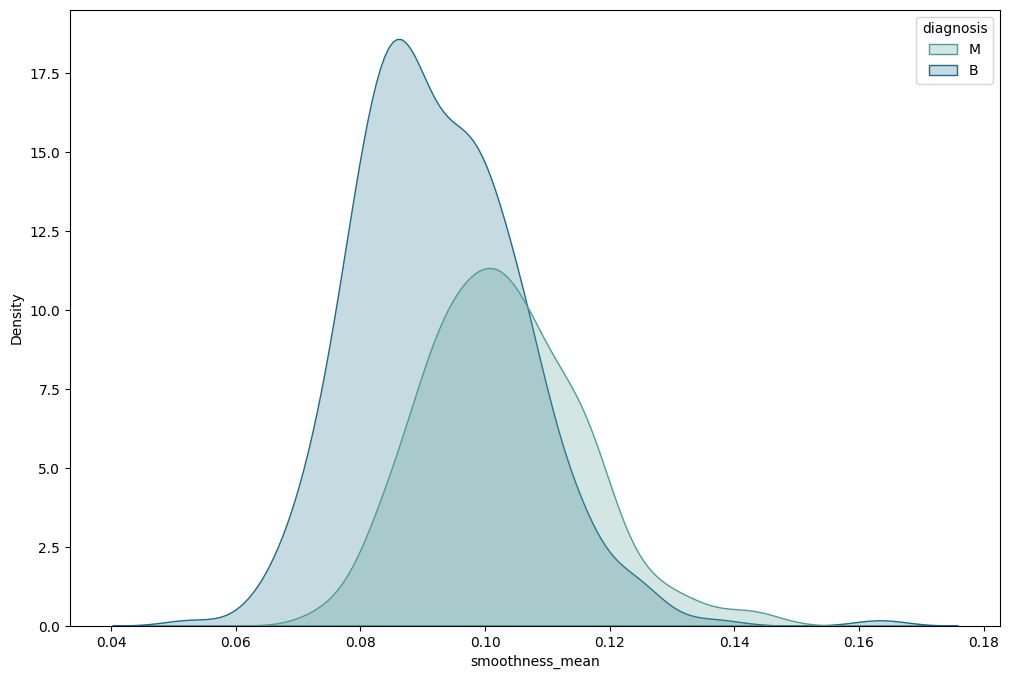

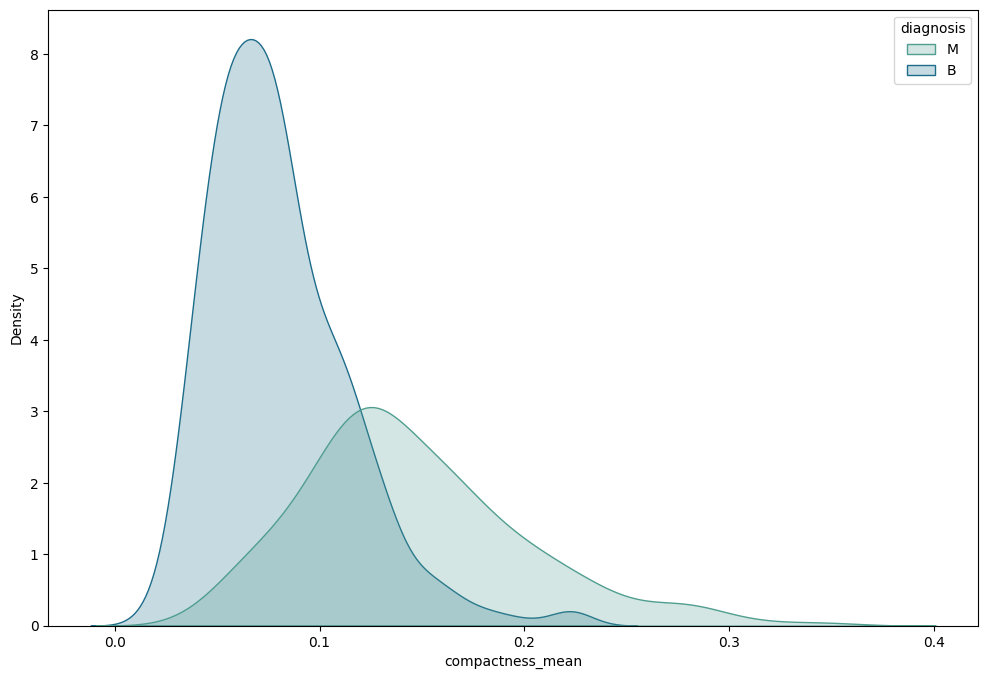

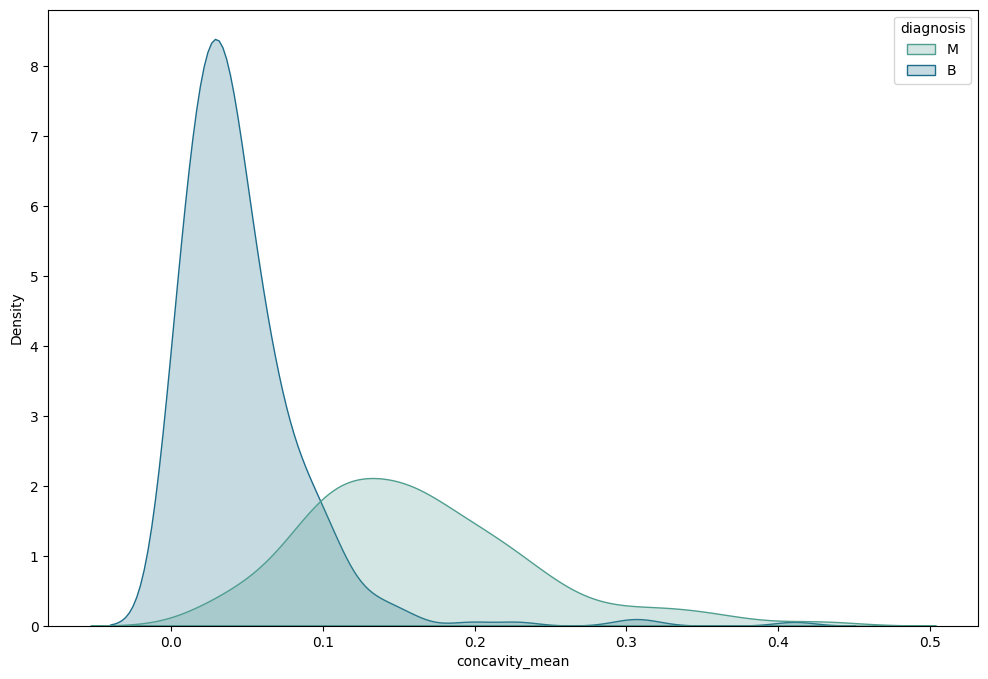

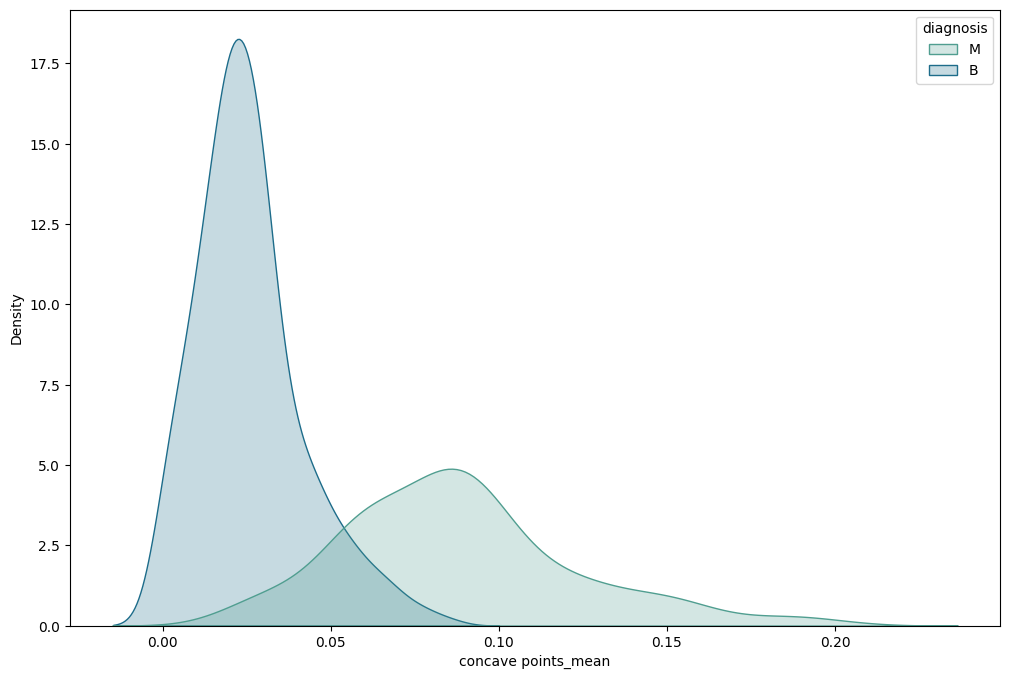

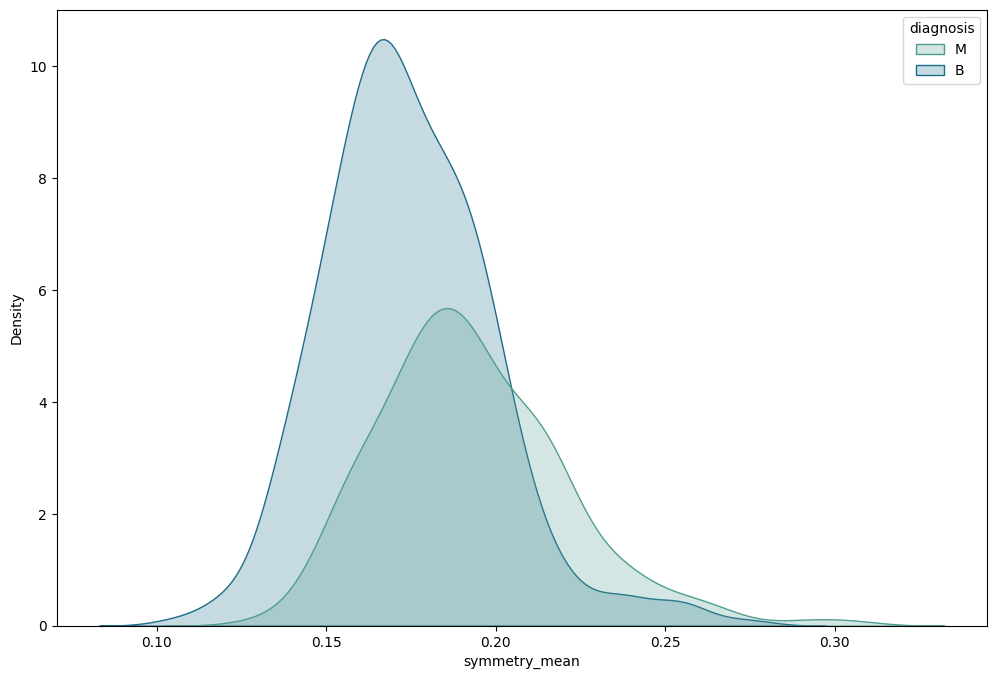

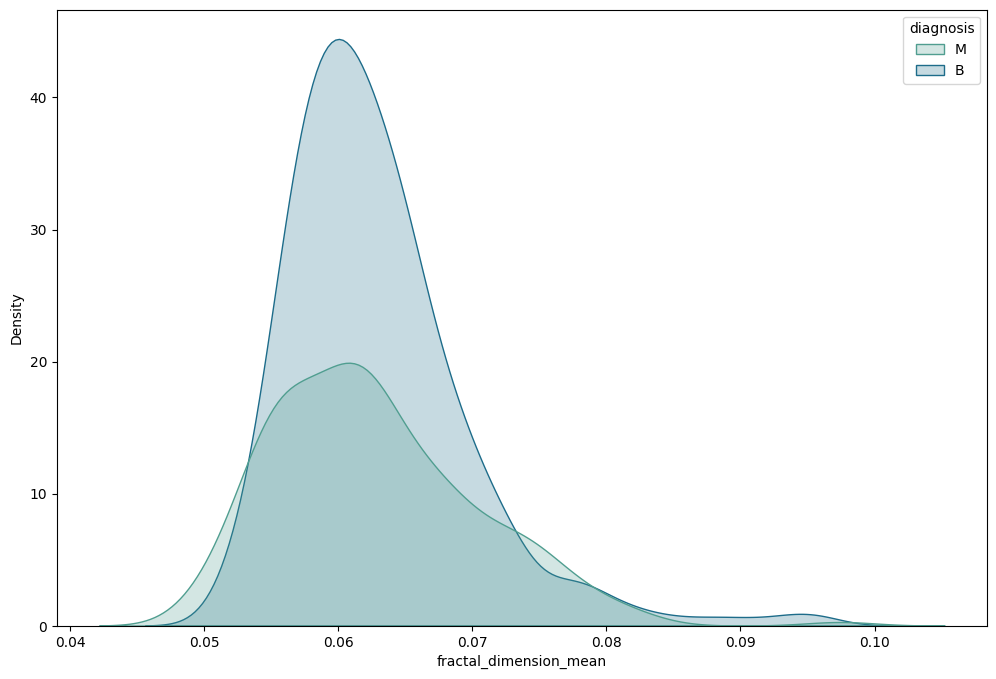

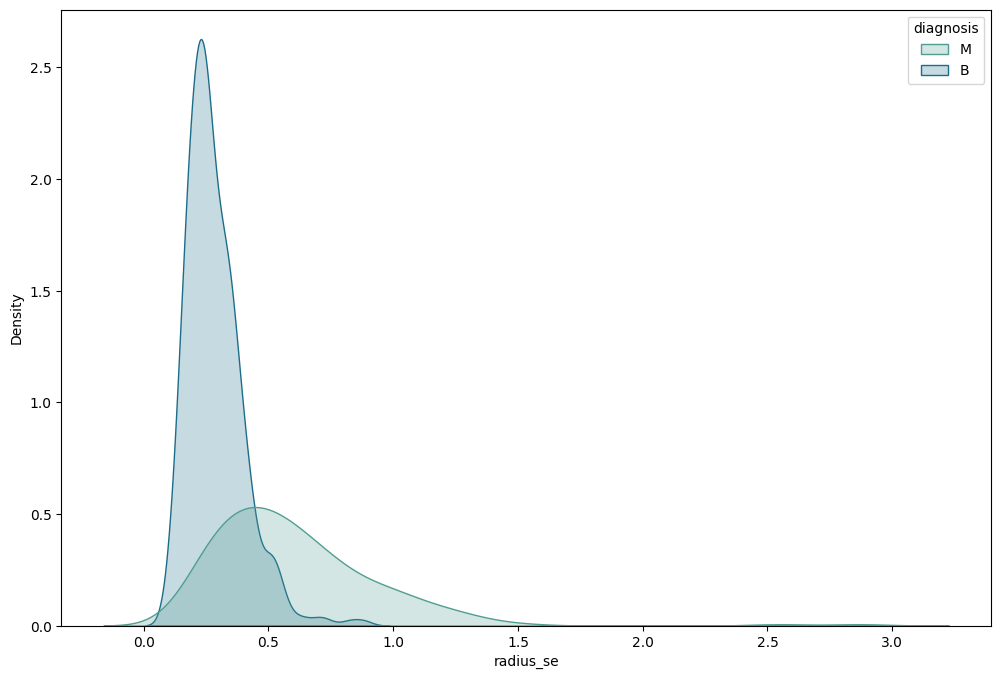

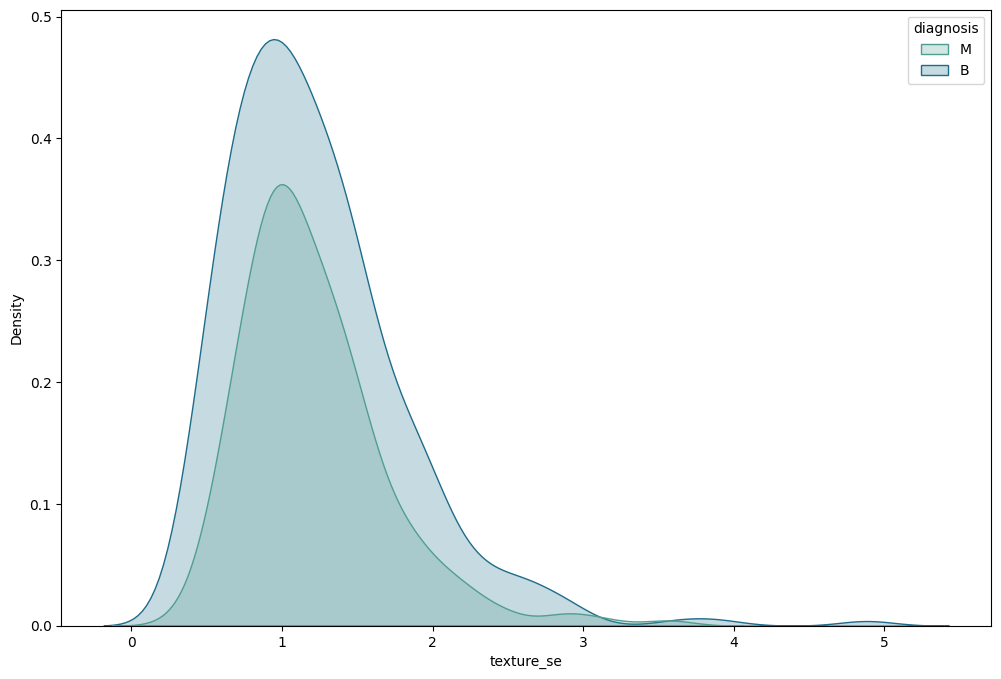

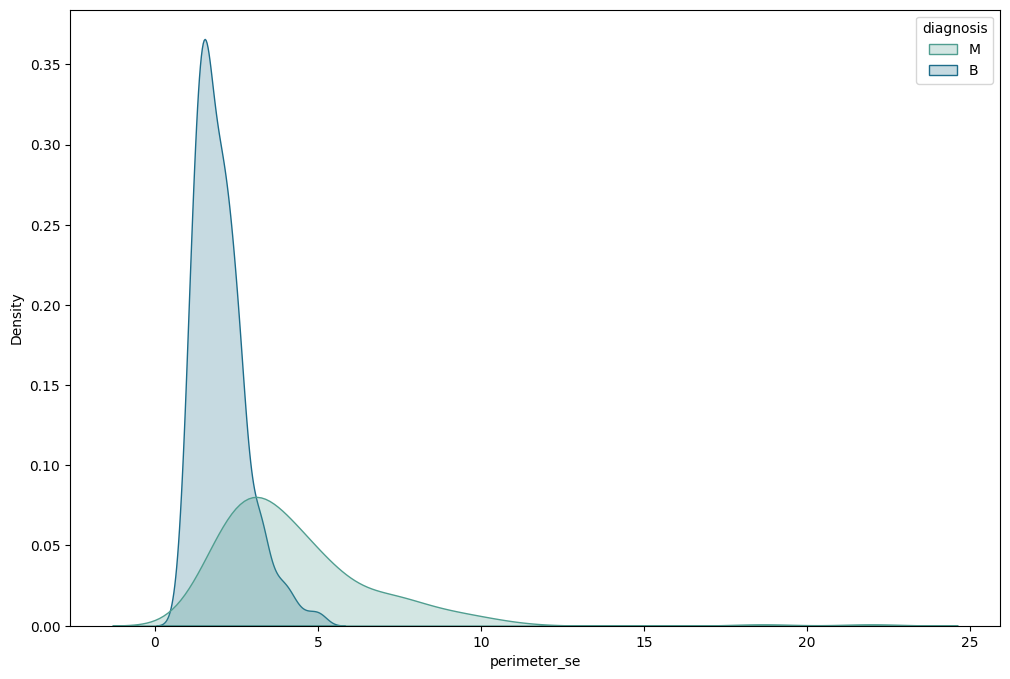

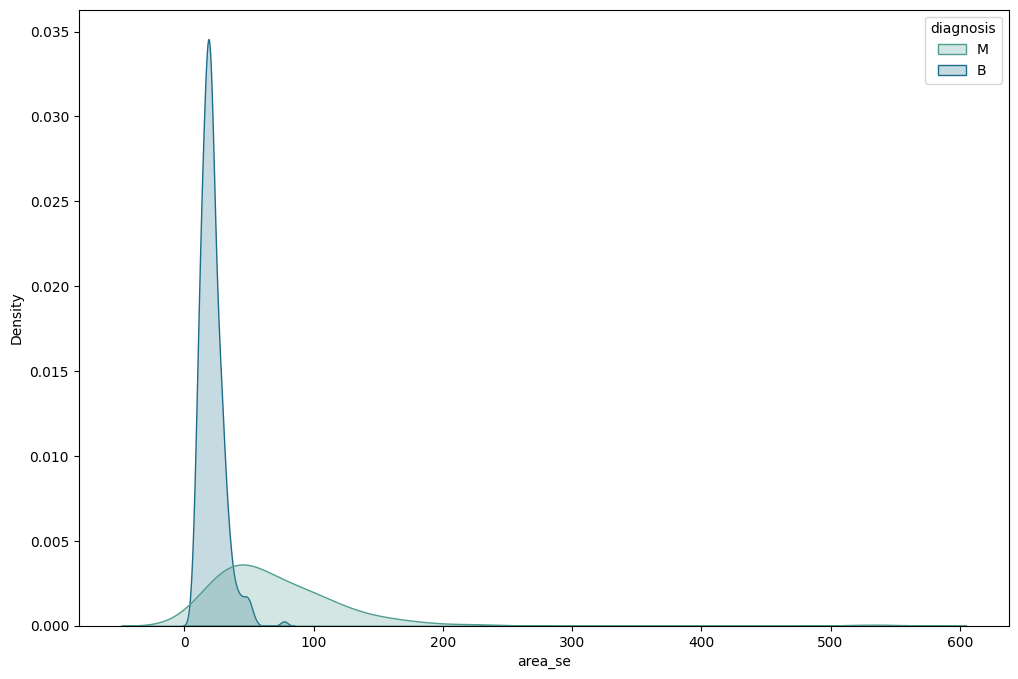

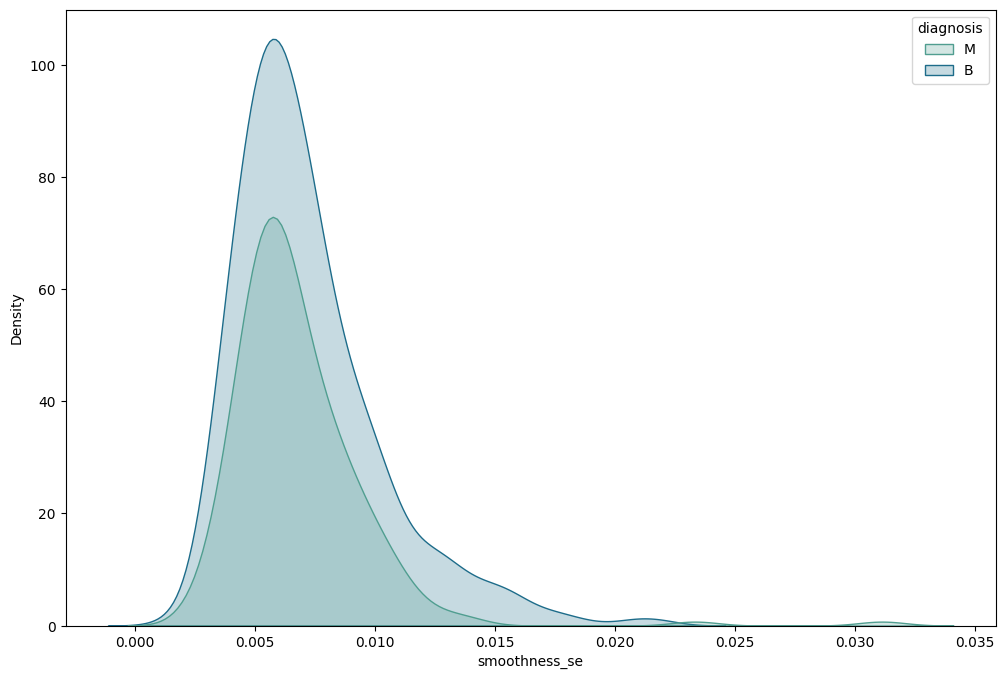

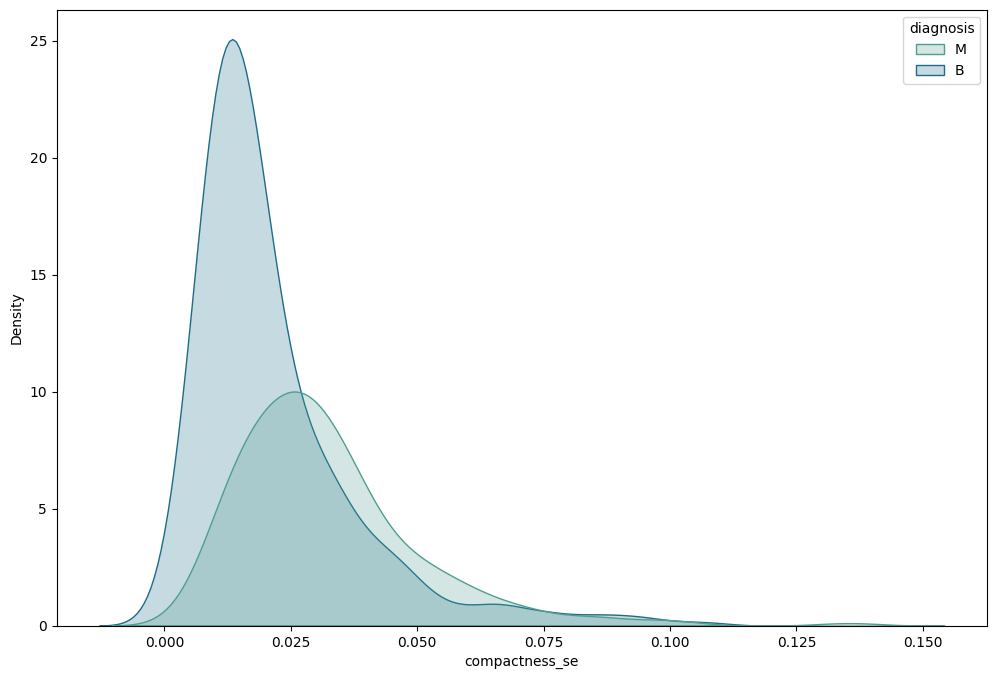

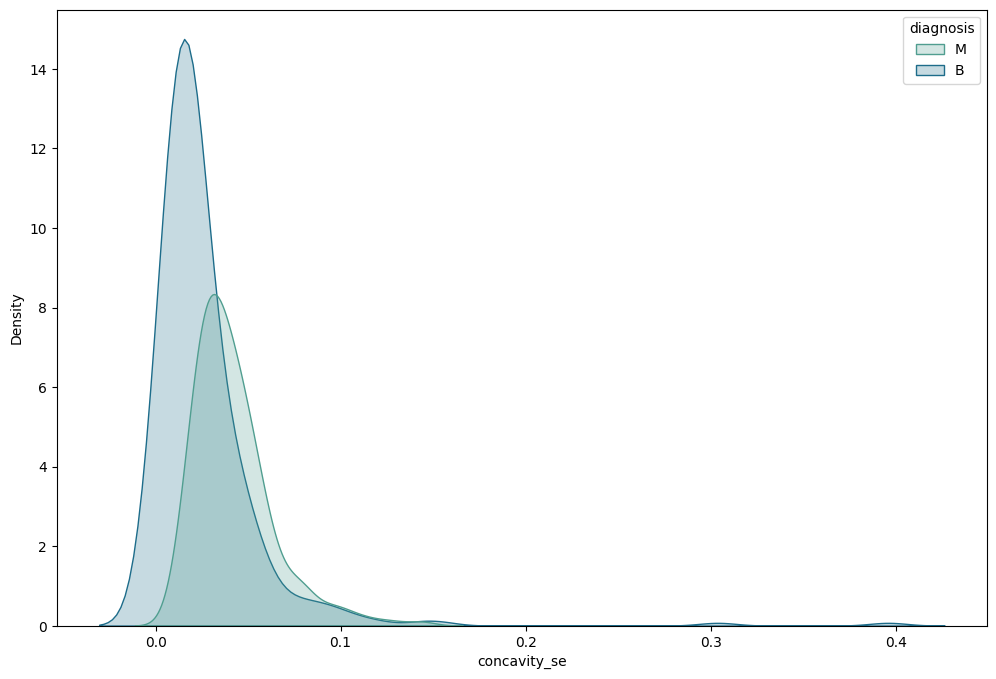

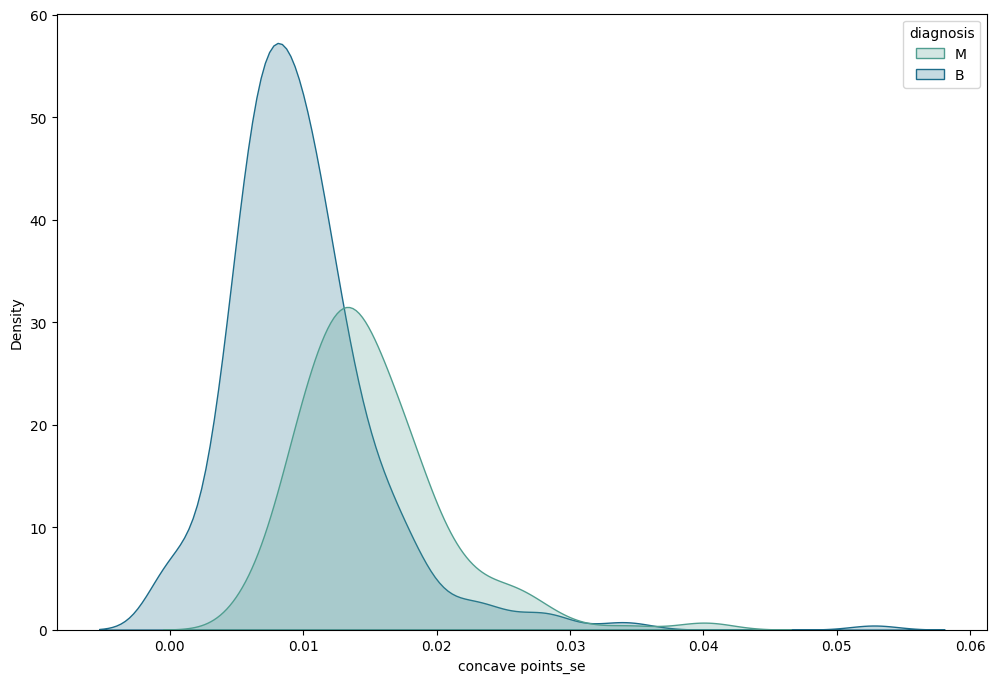

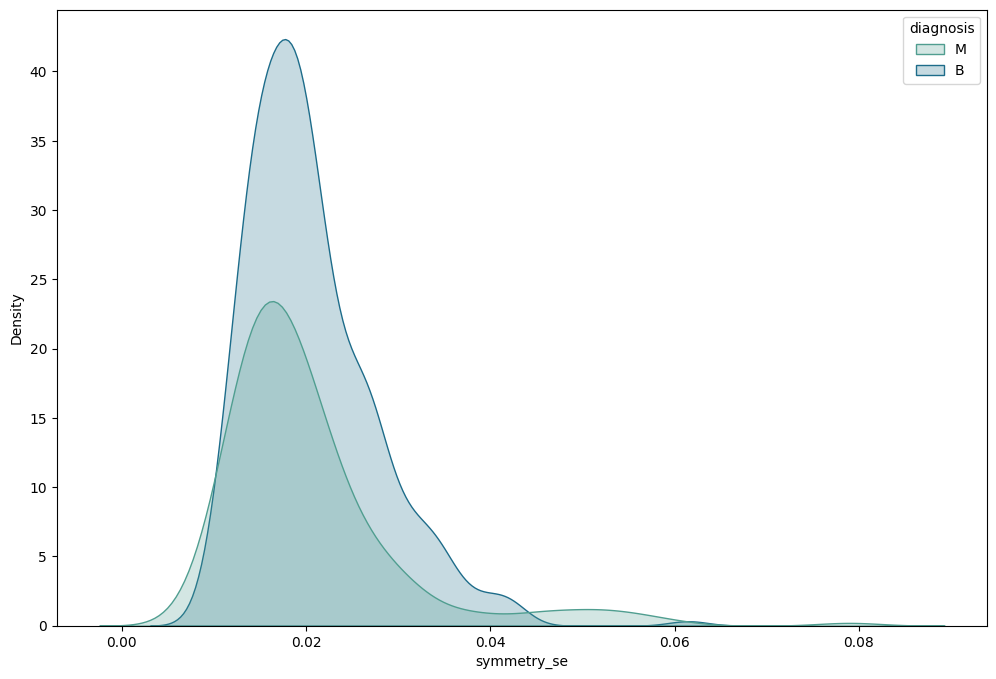

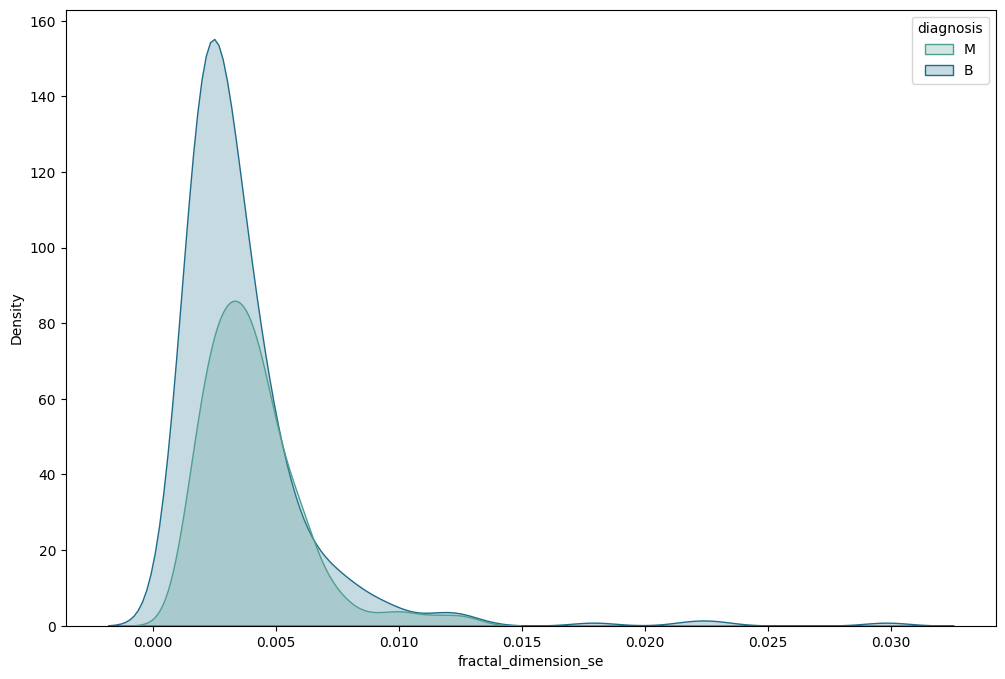

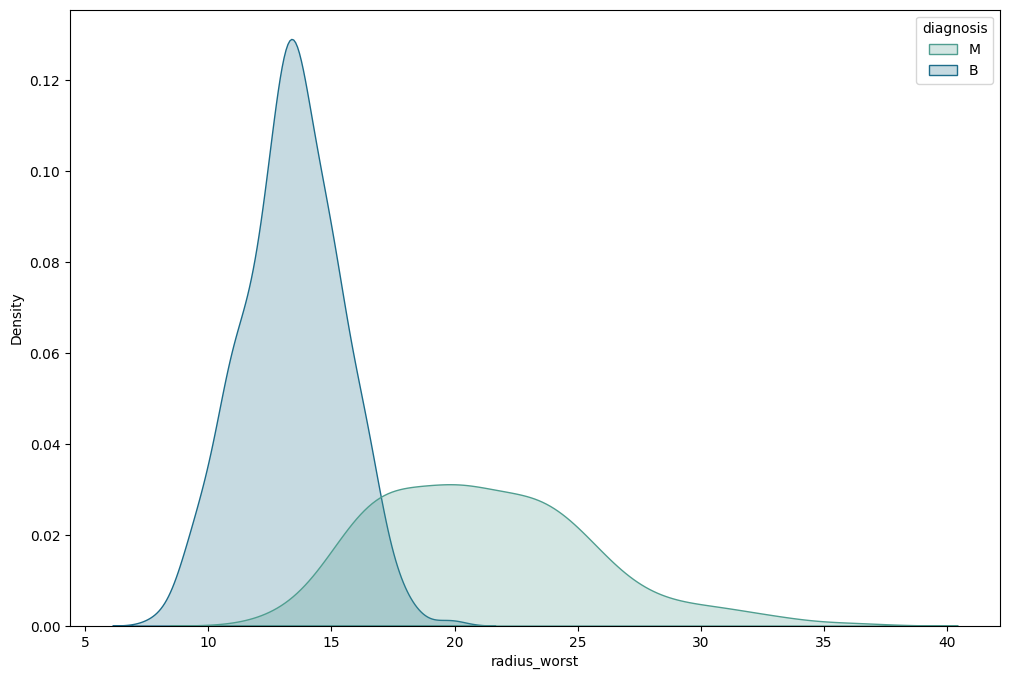

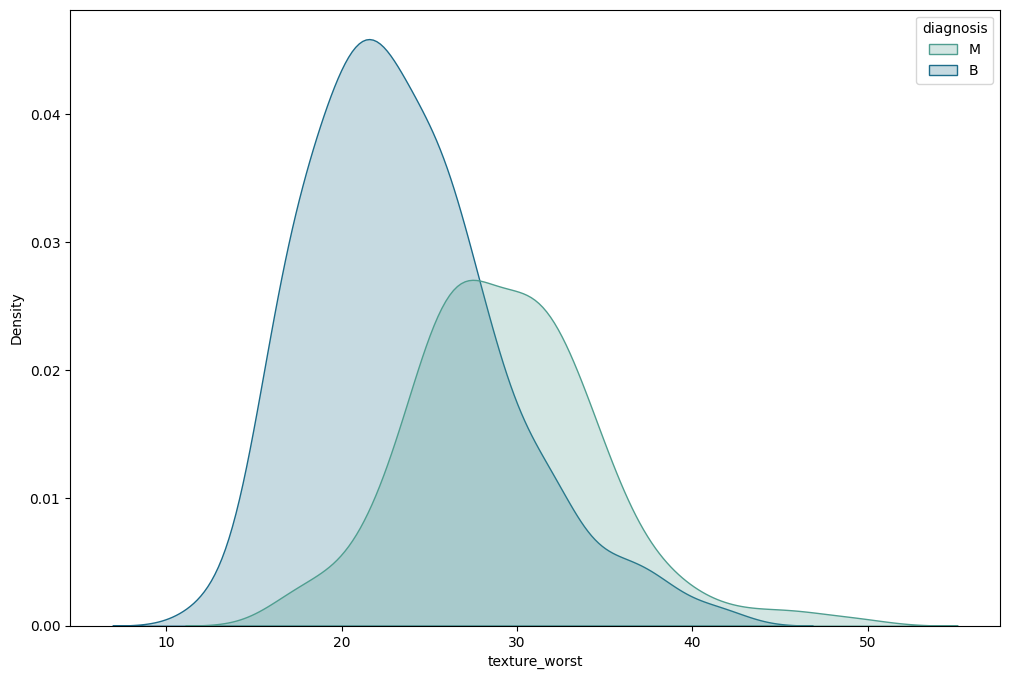

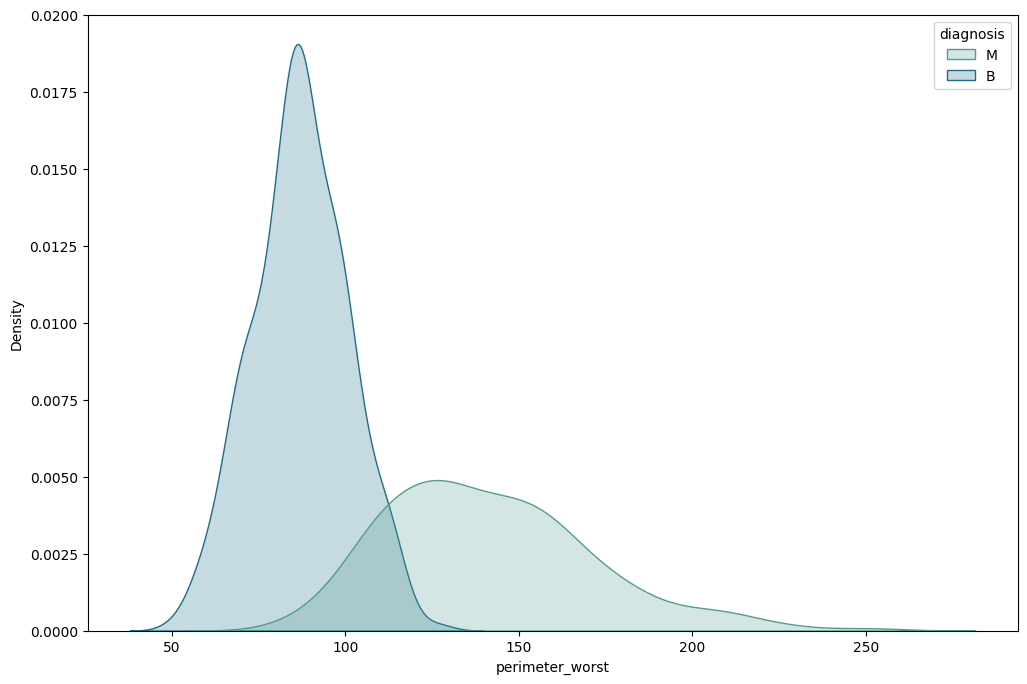

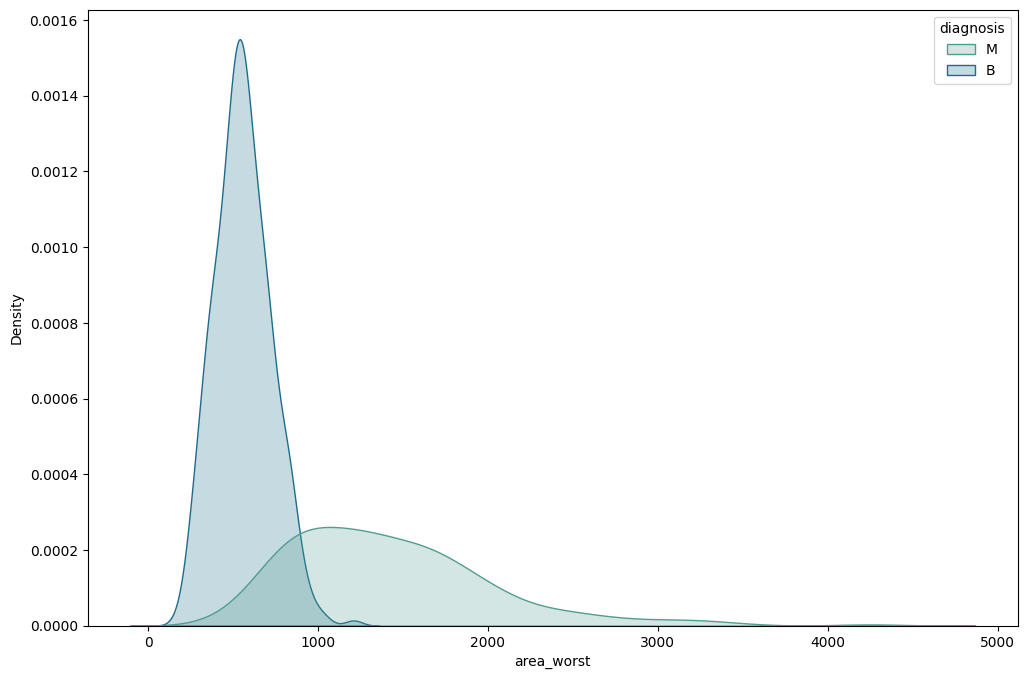

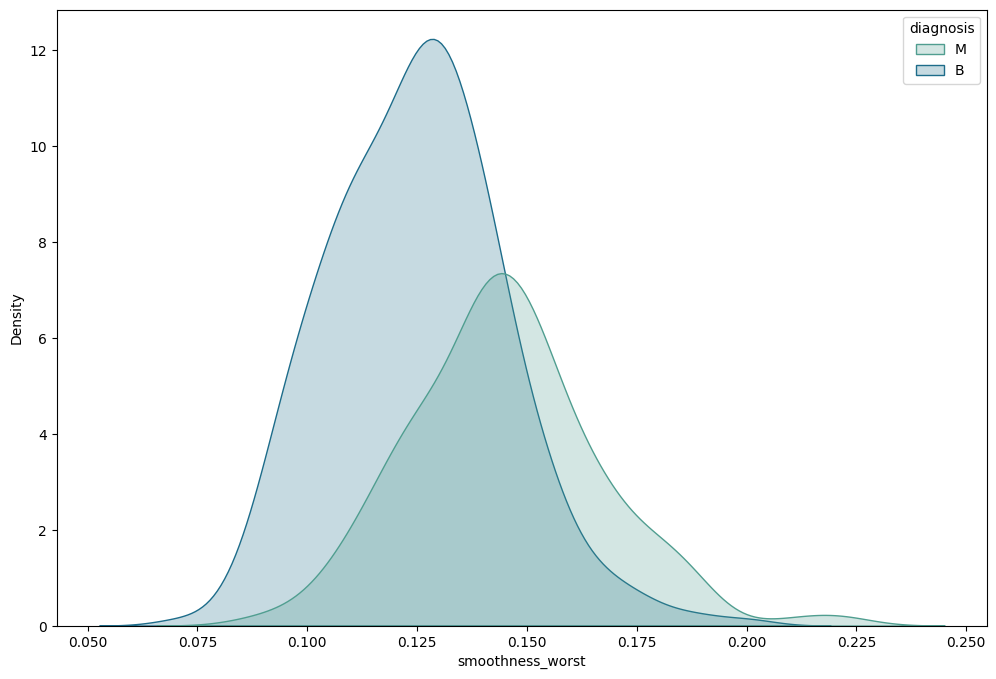

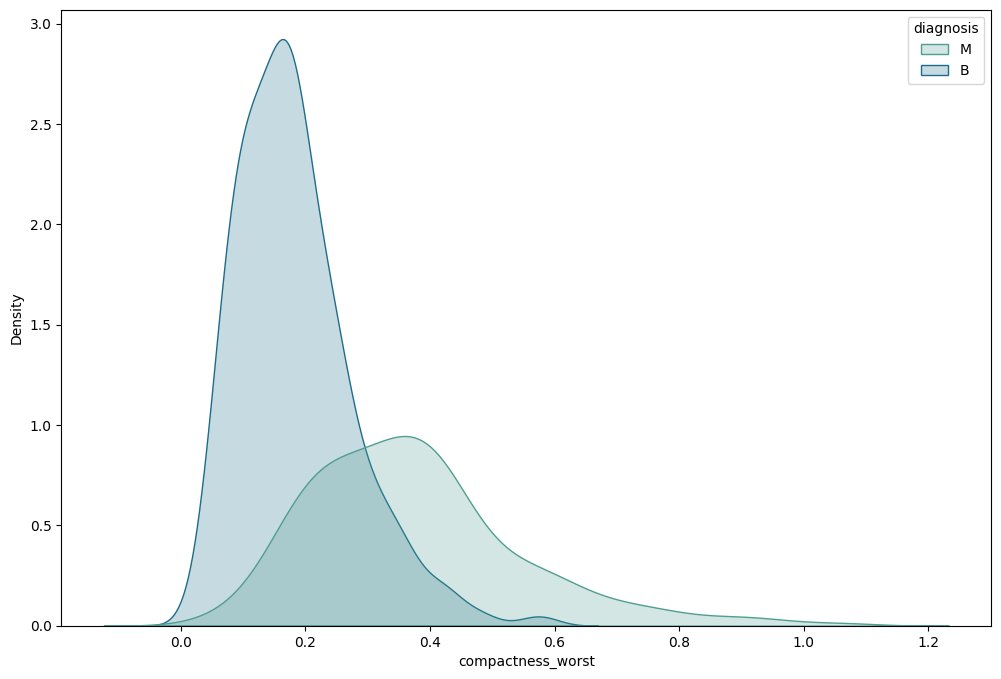

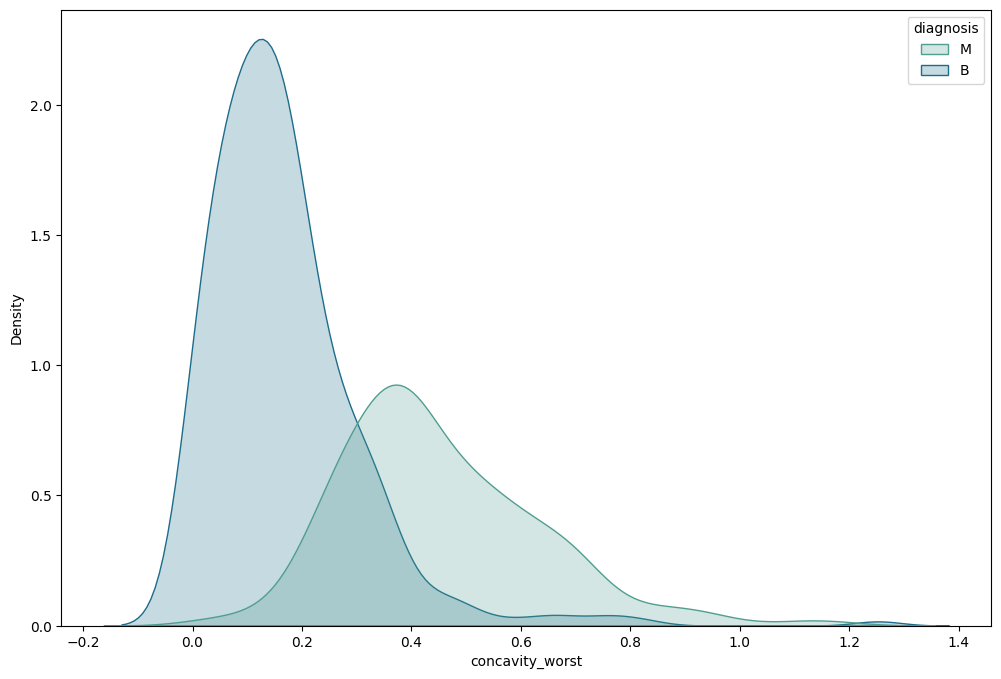

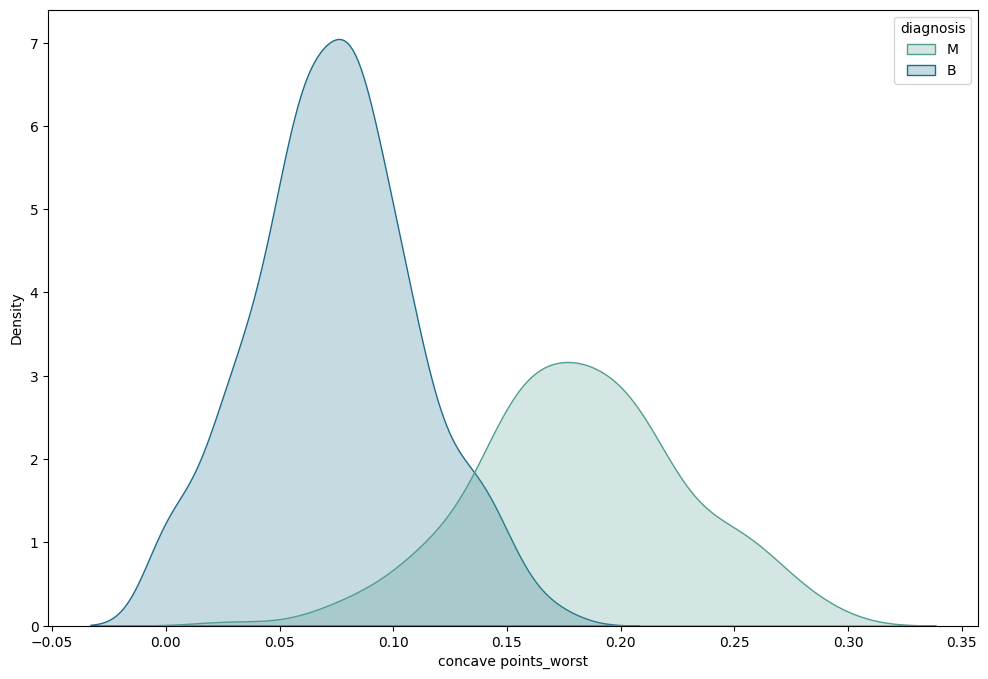

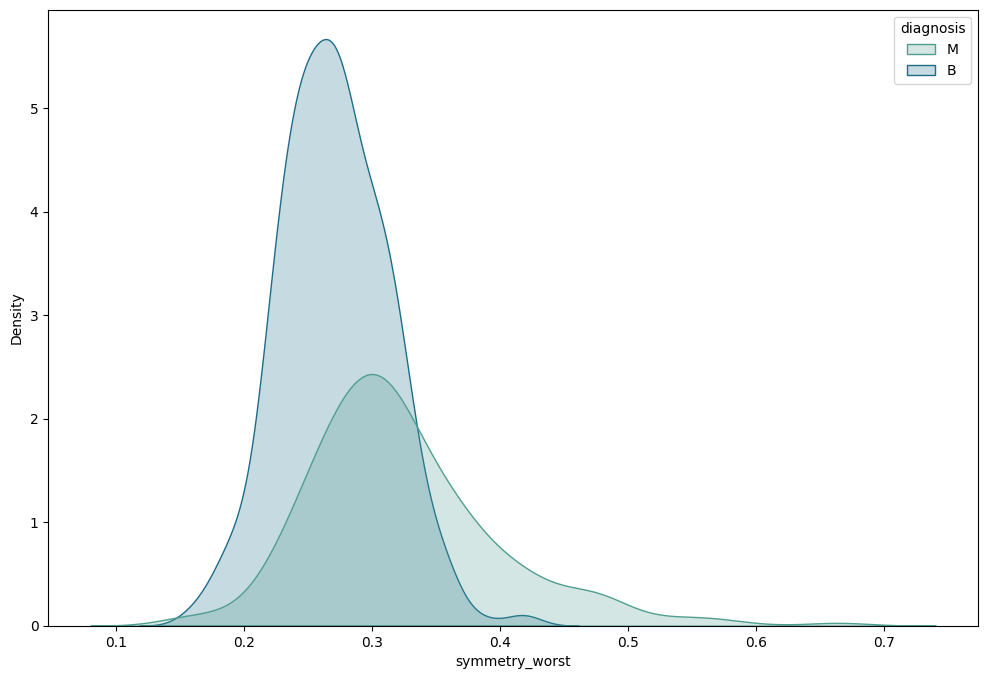

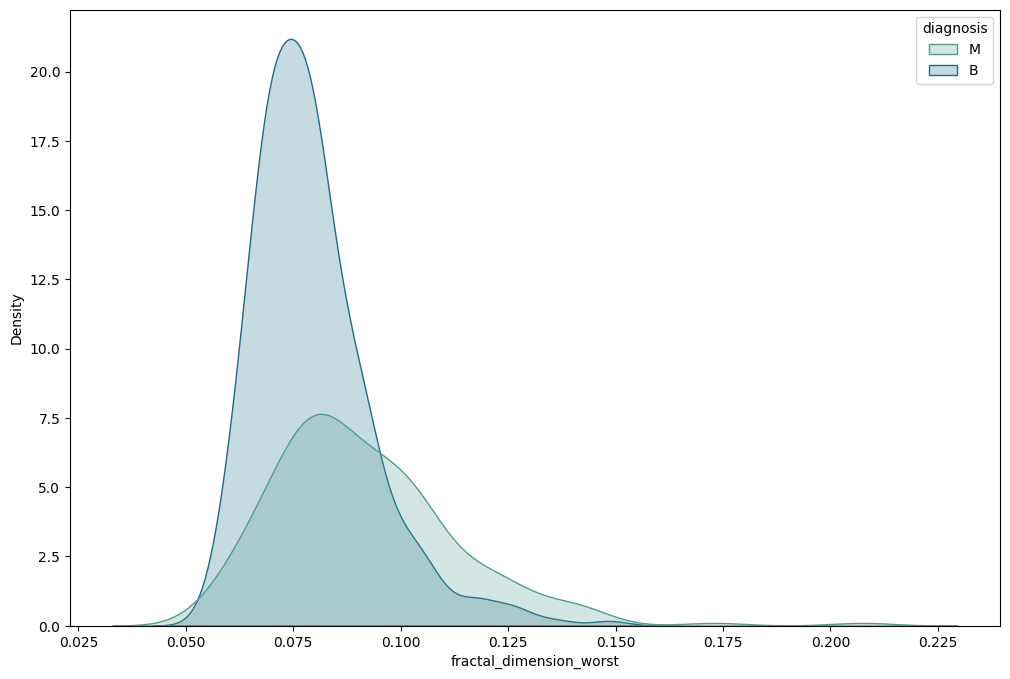

In [14]:
for column in numeric_columns:
    plt.figure(figsize=(12,8))
    sns.kdeplot(data=df, x=column, hue='diagnosis', palette="crest", fill=True)
    plt.show()

**Print the first 5 rows of the data**

In [15]:
df.head(5)

,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
# Get the correlation of the columns
df.iloc[:,1:12].corr()

<ipython-input-16-273764f6f692>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.iloc[:,1:12].corr()


,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
Radius_mean,1.000000,0.326716,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
Texture_mean,0.326716,1.000000,0.332231,0.324149,-0.024737,0.235863,0.302324,0.294307,0.071390,-0.077844
perimeter_mean,0.997855,0.332231,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.987357,0.324149,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.170581,-0.024737,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.506124,0.235863,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.676764,0.302324,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.822529,0.294307,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.147741,0.071390,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
fractal_dimension_mean,-0.311631,-0.077844,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


<ipython-input-17-ca9a3664aa84>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

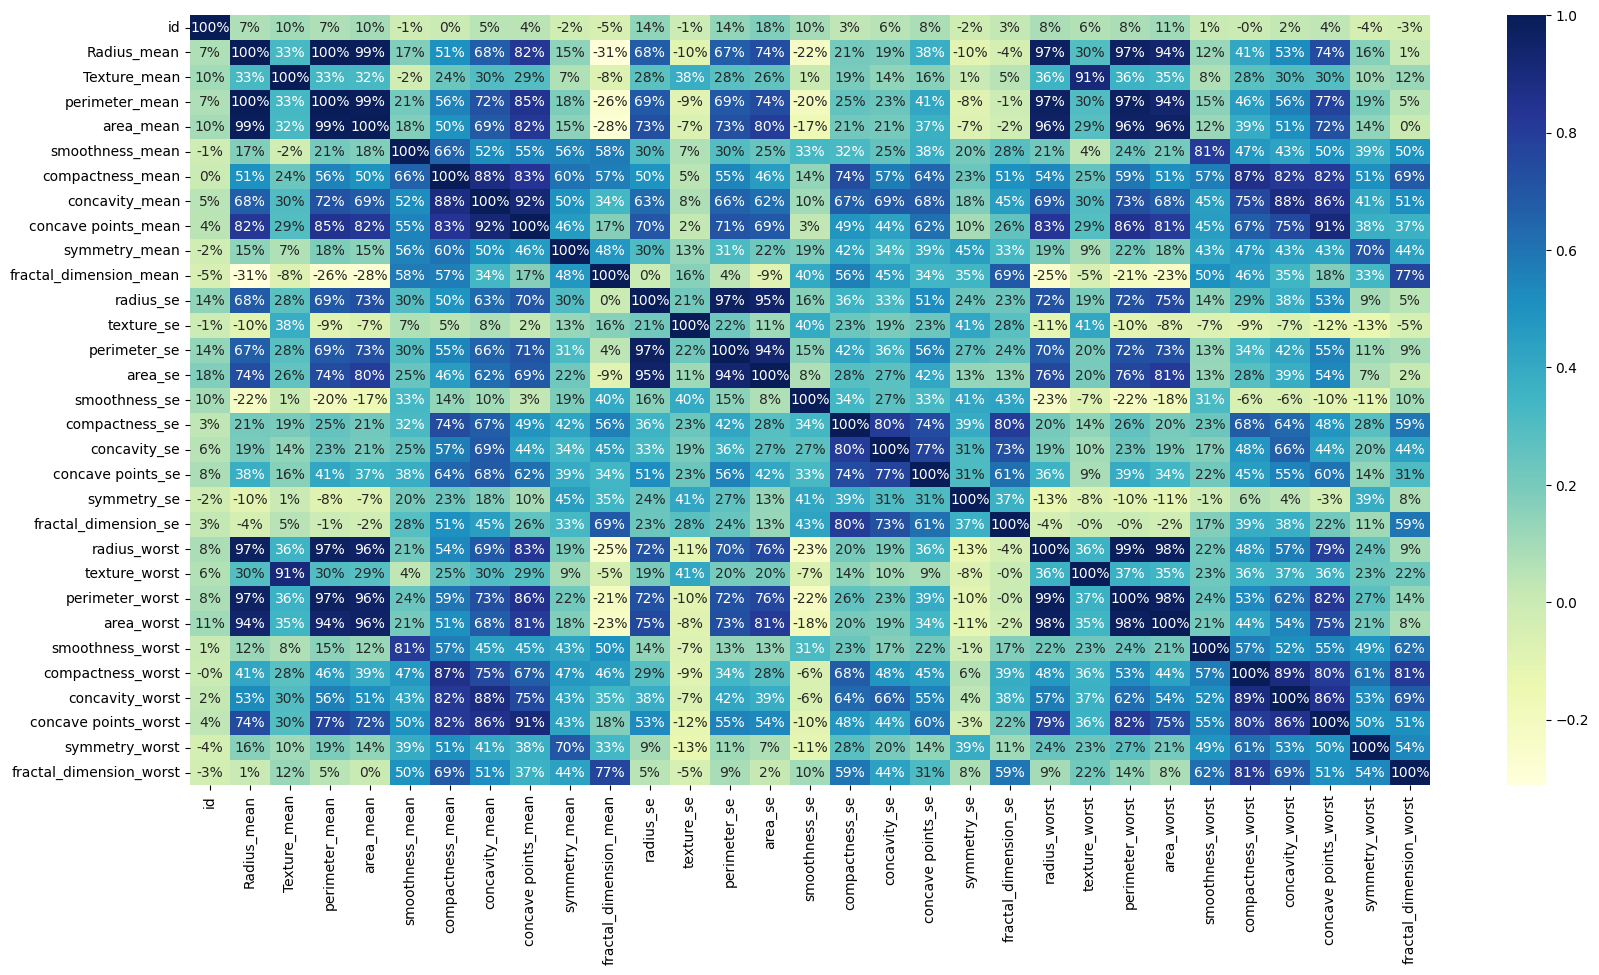

In [17]:
# Visualize the correlation of all row from column 1 to column 11.
plt.figure(figsize = (20,10))
corr = df.corr()
#sns.heatmap(df.iloc[:,1:12].corr())
sns.heatmap(corr , annot = True , cmap = "YlGnBu" , fmt = '.0%')

**Data Preprocessing and pipelining**

In [18]:
# Split the data set into independent (x) and dependent (y) data sets.
x = df.iloc[:,2:31]
y = df.iloc[:,1]

In [19]:
# split the data into 75% tranining and 25% testing.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)


In [20]:
# scale the dat (called Feature Scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
y_test = sc.fit_transform(x_test)

In [21]:
from numpy.random import random_integers
# Creat a function for the models
def models(x_train, y_train):

 # Logestic Regression
 from sklearn.linear_model import LogisticRegression
 log = LogisticRegression(random_state = 0)
 log.fit(x_train , y_train)

 # Decission  Tree classification 
 from sklearn.tree import DecisionTreeClassifier
 tree = DecisionTreeClassifier(criterion = 'entropy' , random_state = 0)
 tree.fit(x_train , y_train)

 # Random Forest Classifier
 from sklearn.ensemble import RandomForestClassifier
 forest = RandomForestClassifier(n_estimators = 10 , criterion = 'entropy', random_state = 0 )
 forest.fit(x_train, y_train)

 # Print the models accuracy on the training data
 print('[0] Logistic Regresson Training Accuracy:' , log.score(x_train , y_train))
 print('[1] Decission  Tree classification Training Accuracy:' , tree.score(x_train , y_train))
 print('[2] Random Forest Classifier Training Accuracy:' , forest.score(x_train , y_train))
 return log , tree, forest


In [22]:
# Getting all of the models
model = models(x_train, y_train)

[0] Logistic Regresson Training Accuracy: 0.9906103286384976
[1] Decission  Tree classification Training Accuracy: 1.0
[2] Random Forest Classifier Training Accuracy: 0.9953051643192489


In [23]:
# Test model accuracy on test data on confusion matrix.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model[0].predict(x_test))
print(cm)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


ValueError: ignored

In [24]:
# Show another way to get metrix of the models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print ( classification_report( y_test , models[0].predict(x_test)))
print ( accuracy_score(y_test , models[0].predict(x_test)))

TypeError: ignored